# Machine Learning & Data Preprocessing Example
#### Dr. Ben Mitchell
This is a worked example walking through one possible version of examining and pre-processing a dataset and then applying some machine learning algorithms.  It's not intended to be a comprehensive list of all the things we could possibly do, but at least it shows you a few examples of the kind of things you can try when you're exploring a new data set and trying to prepare it for machine learning.

The dataset in question is based on the passenger list from the Titanic; each pasenger has a record, including as much information as is known, along with whether or not that passenger survived the disaster when the ship sank.  The standard supervised learning task for this data set is to predict whether a given passenger survived given the rest of their information.   If who survived was random, this shouldn't work (we wouldn't be able to do better than chance), but if it's not random then we might be able to build a successful classifier, and ideally even understand what kind of traits the survivors had in common.

This data was first posted on Kaggle: https://www.kaggle.com/c/titanic/data, and that site also has a description of what the columns mean.

In [1]:
# import data handling libraries
import pandas as pd
import numpy as np

# set up for plotting figures
%matplotlib notebook
import matplotlib.pyplot as plt

### Reading the data
The raw data comes to us as a comma-separated-value (CSV) file, which we will use pandas to read.  We'll then take a first look at the data to see what we've got to work with.

In [2]:
# read the file; this assumes it's in the same directory as this notebook
data = pd.read_csv('titanic.csv')

In [3]:
# let's look at the first few records to get a sense for what the data looks like
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# this will print some basic stats on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# let's make sure that the "Survived" column is really structured like we think
data['Survived'].unique()

array([0, 1])

In [6]:
# let's see how many people survived; we can use "sum" since the value is 1 or 0
print('number who survived:', data['Survived'].sum())
pSurvived = data['Survived'].sum() / data['Survived'].count()
print('liklihood of survival:', pSurvived)

number who survived: 342
liklihood of survival: 0.3838383838383838


## Problems we can spot right away
There are several issues with this dataset which should immediately be concerned about if we want to do machine learning using this data.

 - The first attribute is "PassengerId", and it seems to be a unique identifier.  This is going to be a problem, because unique IDs are great for classifying training examples, but useless for trying to generalize to novel examples.  We're probably going to be better off just getting rid of this feature entirely.
 
 - The "Cabin" attribute appears to be missing for about half the examples; in the first 20 rows, there are 15 'NaN' values ('NaN' is short for 'Not a Number'), and the summary statistics say there are a total of 891 entries, but only 204 of them are "non-null objects" (i.e. 891-204=686 are missing).  The values we do have are non-numeric (e.g. 'C103' is a letter and a number); we'll have to take a closer look at what's in this column, but with that number of missing values we're probably not going to be able to do much useful with it.
 
 - The "Ticket" attribute looks very non-uniform (e.g. some are numbers, some have letters), and they look like there's not much repetition; this might be another "unique ID", but we can check that pretty easily.
 
 - The "Name" attribute is also going to be a problem, since it's likely to be unique as well
 
 - The "Sex", "Age", "Fare", and "Embarked" columns have missing values as well; "Sex" and "Age" only have a few missing values, and they seem fairly well structured (i.e. we can understand what they mean, the values are consistently formatted, etc.).  "Fare" and "Embarked" look well structured, but they've got more missing values, so it's going to be more problematic trying to fill them in.

In [7]:
# let's look at the unique values of "cabin" that show up
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
# now let's count how many different values there are for "cabin" and "ticket"
print('unique "ticket" values:', len(data['Ticket'].unique()))
print('unique "cabin" values:', len(data['Cabin'].unique()))

unique "ticket" values: 681
unique "cabin" values: 148


### Removing unhelpful attributes
Since we've got several attributes that are likely to function as distractors, we want to remove them.  The simplest way is to just "drop" those columns from our table.  In this case, "Ticket" and "Cabin" aren't completely unique to a given passenger, but there are so few repeats that they're not going to help us at generalization, and "Name" and "PassengerID" are definitely not going to help us, so we'll just drop those four features from our data set as a first step in generating a "cleaned" version of the data.

In [9]:
clean = data.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis = 1)

In [10]:
clean[0:20]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [11]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Better, but still not perfect
Most of our remaining attributes are fine, but we've still got a few missing values for "Embarked", and more for "Age".  At this point, we've got a couple of options.  We don't really want to drop those columns, since they might be helpful and the number of missing values is fairly small.  We could drop just the examples that have missing values, but that might introduce a sampling bias...let's check:

In [12]:
pSurvivedClean = clean['Survived'].sum() / clean['Survived'].count()
print('liklihood of survival (cleaned data):', pSurvivedClean)

# just the ones where age is not missing
noMissing = clean.dropna()
pSurvivedDropMissing = noMissing['Survived'].sum() / noMissing['Survived'].count()
print('liklihood of survival (drop missing examples):', pSurvivedDropMissing)

#just the ones where age is missing
missingAge = clean[pd.isnull(clean['Age'])]
pSurvivedMissingAge = missingAge['Survived'].sum() / missingAge['Survived'].count()
print('liklihood of survival (just missing examples):', pSurvivedMissingAge)

liklihood of survival (cleaned data): 0.3838383838383838
liklihood of survival (drop missing examples): 0.4044943820224719
liklihood of survival (just missing examples): 0.2937853107344633


### Hmm, looks like a problem
This looks like it could be a source of sampling bias; there's a pretty big difference between the survival percentage on the examples with and without age (30% vs 40%).  If we just drop these examples, we're changing our problem in a serious way, so we don't want to do that.  But scikit-learn generally doesn't handle missing attributes well, so we're going to have to do something.

We could try just filling in missing values using the mean, but we'll need to be careful because that might end up being misleading too (we have no evidence that the ones missing age have the same distribution as the ones where it's present, and mean/median imputation always compresses variance).

In [13]:
clean['Embarked'].value_counts().idxmax()

'S'

In [14]:
# let's fill in the two missing "embarked" values using mode imputation (since mean/median is only defined for numbers)
modeEmbarked = clean['Embarked'].value_counts().idxmax()
# replace 'na' (i.e. missing values) "in place" in the cleaned table
clean['Embarked'].fillna(modeEmbarked, inplace=True)

# mean imputation - replace missing values with the mean value
meanAge = clean['Age'].mean()
# here we make a new table, instead of operating in place
meanImputed = clean.fillna(meanAge, inplace = False)

# note that we now have 891 values for each attribute (i.e. no missing values)
meanImputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## What's the damage?
We just did things that are likely to change our distribution, so let's take a look and see what happened:

In [15]:
clean.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
meanImputed.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What changed?
The columns other than "Age" are unchanged, but what happened to age?  Well, we've got more values, so the count is higher.  The mean hasn't changed, and the min/max values are the same too; that makes sense, since we basically just added some more copies of the mean value.  The main thing that's different is that the standard deviation was reduced, and the placement of the quantiles changed a bit.  That last part could be a problem, since it's a sign that we've messed with the distribution a bit, but it remains to be seen whether or not it's a problem we need to worry about for this data.

To figure out how concerned we should be, let's try to make some plots to look at what relationship Age has to some of the other features.  We'll start with basic histograms to look at the distribution of age; first an overall histogram, and then we'll look at the ages of passengers who survived and those who didn't separately, to see if there's a meaningful difference.  We'll then do the same for the Fare (which is the other numeric attribute)

<IPython.core.display.Javascript object>


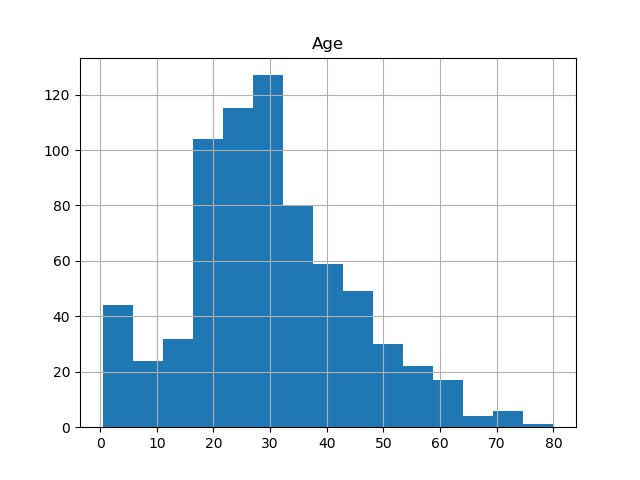

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107a15cf8>]],
      dtype=object)

In [17]:
clean.hist(column='Age', bins=15)

<IPython.core.display.Javascript object>


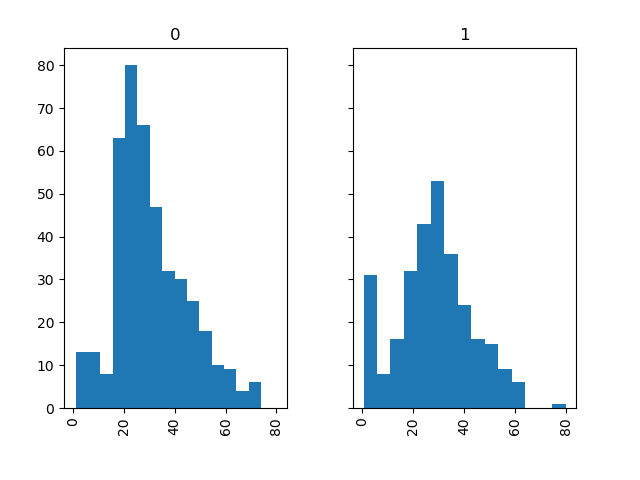

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107a15048>,
      dtype=object)

In [18]:
clean.hist(column='Age', by='Survived', bins=15, sharex=True, sharey=True)

<IPython.core.display.Javascript object>


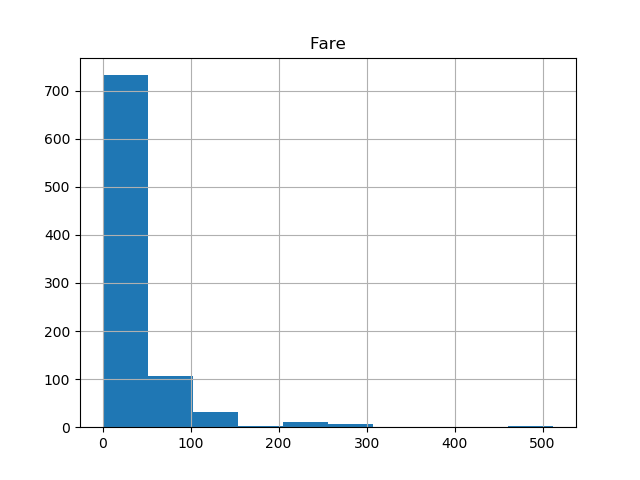

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ac5470>]],
      dtype=object)

In [19]:
clean.hist(column='Fare', bins=10)

<IPython.core.display.Javascript object>


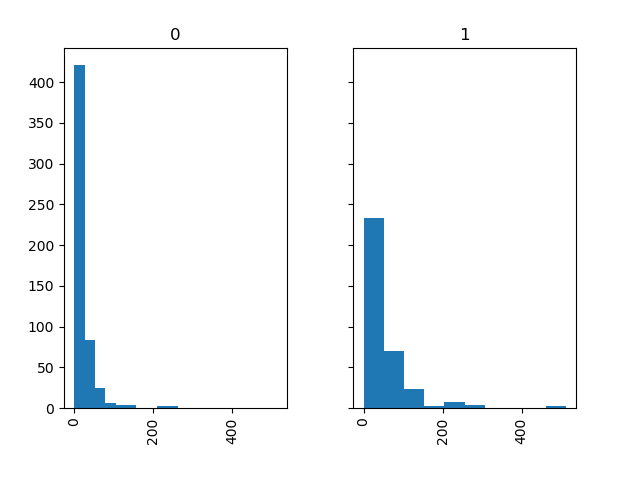

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a677630>,
      dtype=object)

In [20]:
clean.hist(column='Fare', by='Survived', bins=10, sharex=True, sharey=True)

## Is there a pattern?

Based on looking at these histograms, there's a noticable difference.  In particular, there seem to be some ages that are more likely to survive (e.g. very young), and others that are less likely (e.g. around 20).

This suggests that age might be a meaningful predictor of survival, which means that it's probably going to be worth our time to try to come up with something better than just filling in the mean for all missing values.

The Fare, on the other hand, doesn't show a particularly obvious pattern; there were clearly a lot more cheap tickets sold than expensive ones, but there's not an obvious trend otherwise.

We can also make a scatterplot of those two features, and use survival for color:

<IPython.core.display.Javascript object>


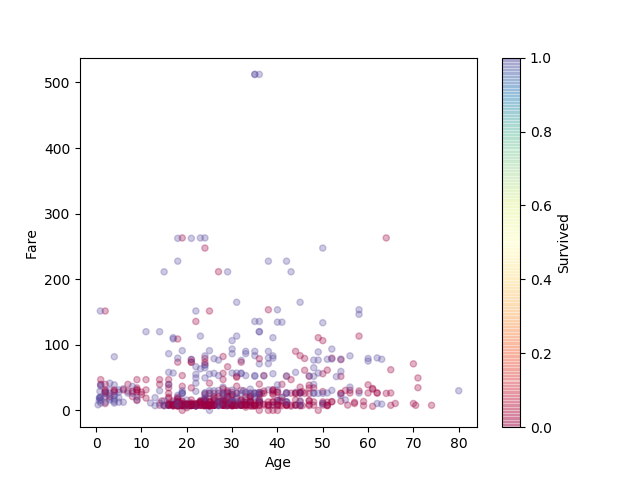

In [21]:
clean.plot.scatter(x = 'Age', y = 'Fare', c = 'Survived', cmap = 'Spectral', alpha=0.3)

## Interesting, but a bit crowded
That plot is a bit hard to read; there's a lot of crowding down low on the Y axis.  We could adjust the axis, but we could also break up the data and plot things differently.  For instance, let's try to plot the survivors on a separate figure from those who died; that will let us use color for something else, like sex.

In [22]:
# split our data into two subsets based on who survived
survived = clean[clean['Survived'] ==1]
died = clean[clean['Survived'] == 0]

<IPython.core.display.Javascript object>


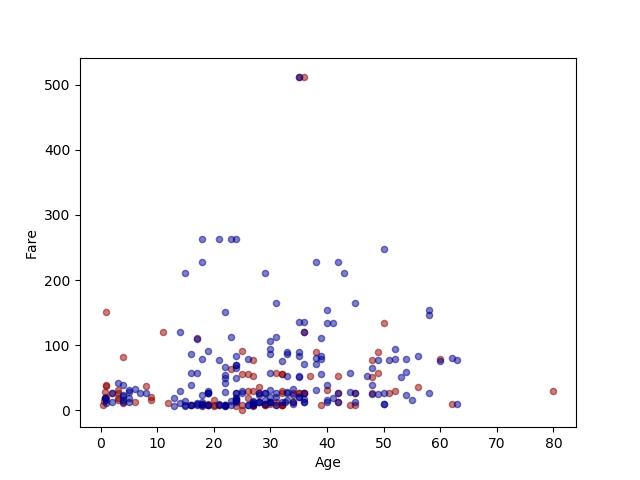

In [23]:
# plot age vs fare for the survivors with male and female in two different colors
p = survived[survived.Sex == 'male'].plot.scatter(x = 'Age', y = 'Fare', color = 'DarkRed', alpha = 0.5)
survived[survived.Sex == 'female'].plot.scatter(x = 'Age', y = 'Fare', color = 'DarkBlue', alpha = 0.5, ax = p)

<IPython.core.display.Javascript object>


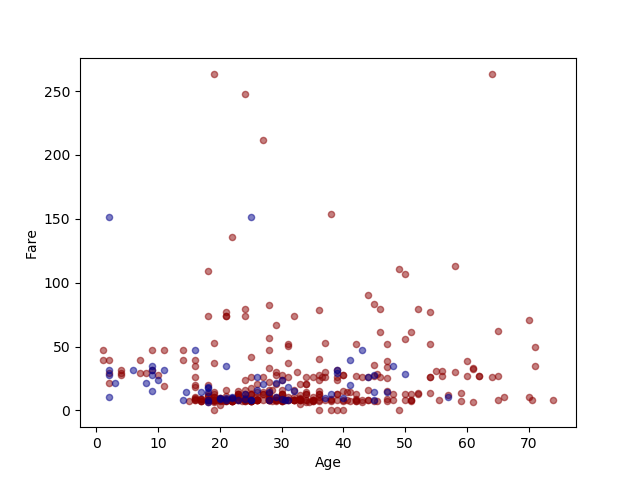

In [24]:
# plot age vs fare for those who died with male and female in two different colors
p = died[died.Sex == 'male'].plot.scatter(x = 'Age', y = 'Fare', color = 'DarkRed', alpha = 0.5)
died[died.Sex == 'female'].plot.scatter(x = 'Age', y = 'Fare', color = 'DarkBlue', alpha = 0.5, ax = p)

## More patterns
From looking at these plots, it seems like while Fare might not be super important, Sex is; there seem to be more 'female' passengers in the plot of the survivors.

There also seem to be a very small number of points with very high "Fare" values; we might want to assess whether these are some kind of mistake or not.  Let's look at the sorted list of fares:

In [25]:
data['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
413      0.0000
674      0.0000
263      0.0000
466      0.0000
732      0.0000
179      0.0000
806      0.0000
481      0.0000
822      0.0000
815      0.0000
378      4.0125
872      5.0000
326      6.2375
843      6.4375
818      6.4500
371      6.4958
202      6.4958
654      6.7500
143      6.7500
411      6.8583
825      6.9500
129      6.9750
804      6.9750
477      7.0458
611      7.0500
         ...   
31     146.5208
708    151.5500
498    151.5500
305    151.5500
297    151.5500
609    153.4625
332    153.4625
268    153.4625
856    164.8667
318    164.8667
779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
380    227.5250
557    227.5250
716    227.5250
118    247.5208
299    247.5208
742    262.3750
311    262.3750
27     263.0000
88     263.0000
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891,

## Outliers?

While we do have some large values, this doesn't look like an obvious case of a mistake (e.g. someone wrote down a bad number).  The overall pattern in the top most fares seems reasonably consistent with the idea that these numbers are real, though the fractional values suggests that there might have been some kind of conversion (e.g. perhaps some of these were originally round numbers in some other currency, and the conversion to dollars was done at 4 digits of precision when the data were prepared for this exercise).

It's also worth looking at some of those examples; we have the example index values, so we can see what the rest of those entries look like:

In [26]:
data[271:272]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S


In [27]:
data[597:598]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [28]:
data[258:259]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [29]:
data[679:680]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


#### Probably reasonable
The passengers with zero fare all seem to have "LINE" as their ticket number, which suggests that they didn't have normal tickets, but rather were riding free (perhaps as crew, or special guests of the cruise line).  The high value tickets look like they are from relatively complete records of survivors, which suggests that it's less likely to be a mistake.

# Proxies for Age?

Given that we think Age might be important, we'd like to try to do a more accurate job of imputing (i.e. guessing) ages.  The best way to do this is to try to find other features that can serve as "proxies" for age, i.e. they have values that correlate strongly with age and therefore can be used to re-construct age when it's missing.

Let's first take a look at the Passenger Class (Pclass) attribute, in conjunction with age and sex, to see if it could be used as an indicator of age:

<IPython.core.display.Javascript object>


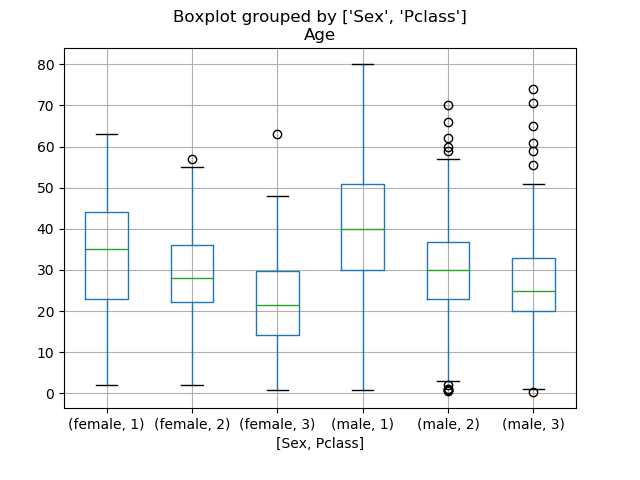

In [30]:
data.boxplot(column = 'Age', by = ['Sex', 'Pclass'])

## Passenger class as a proxy?
Well, there does seem to be some relationship here; the higher values of passenger class seem to correspond to lower ages, but there's still enough spread that we'd like to do better than this.  What other features could we use?  Well, we've checked the things in the "cleaned" set that seem like they might work, and Pclass was the best we found (we could check Embarked, or the number of siblings/parents, but those seem less likely to be helpful).

One thing that we initially threw out but that might help is the names; yes, names are unique, but they also have salutations, which might be an indicator of age (e.g. a "Miss" might tend to be younger than a "Mrs").  Let's take a look:

In [31]:
# what does a name look like?
name = data['Name'][0]
name

'Braund, Mr. Owen Harris'

In [32]:
# let's try to get just the salutation
name.split(',')[1].strip().split('.')[0]

'Mr'

In [33]:
# okay, that worked, let's make a function to do it for any example
def getSalutation(name):
    return name.split(',')[1].strip().split('.')[0]

In [34]:
# and now let's add a new column to our original data set that contains just the salutation
data['Salutation'] = data['Name'].apply(getSalutation)

In [35]:
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


<IPython.core.display.Javascript object>


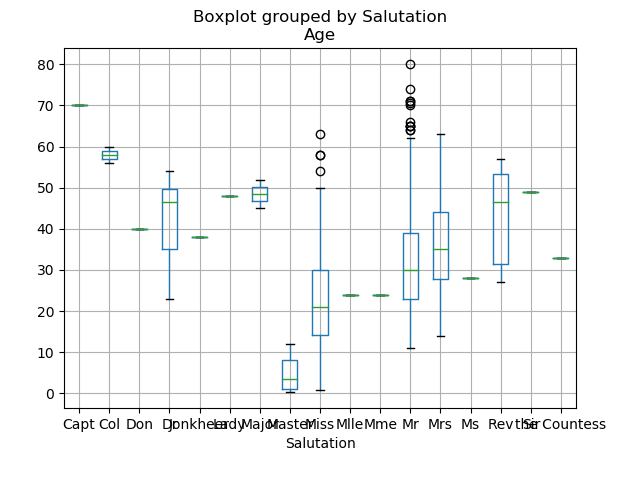

In [36]:
# let's try a box plot by age and salutation
data.boxplot(column = 'Age', by = 'Salutation')

## Promising, but messy
That looks promising, but it's kind of messy; there's a lot of things there, and some seem to have very compact distributions, suggesting small sample sizes.  Let's take a look at how many instances of each salutation there are:

In [37]:
data.groupby('Salutation').Salutation.count()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Salutation, dtype: int64

## Combining salutations
A lot of those only have one or two examples; there are only a few categories that have a lot.  Also, a bunch of these seem like they may be redundant (e.g. Mrs and Mme, or Miss and Mlle, have the same meaning; they're just from different source languages).

As a first pass, we could just keep the most frequent ones and label the other ones "other":

In [38]:
salMap = {}
for s in list(data.Salutation.unique()):
    salMap[s] = 'Other'
for s in ['Mr', 'Mrs', 'Miss', 'Master']:
    salMap[s] = s
salMap

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Don': 'Other',
 'Rev': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [39]:
data['Salutation2'] = data['Salutation'].apply(lambda s : salMap[s])
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs


In [40]:
data.groupby('Salutation2').Salutation2.count()

Salutation2
Master     40
Miss      182
Mr        517
Mrs       125
Other      27
Name: Salutation2, dtype: int64

<IPython.core.display.Javascript object>


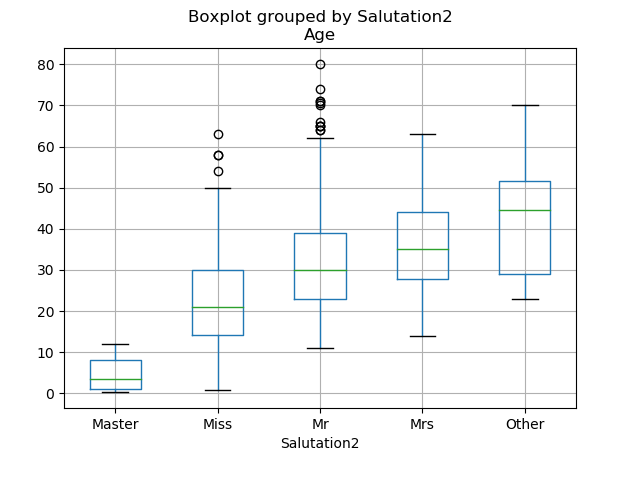

In [41]:
data.boxplot(column = 'Age', by = 'Salutation2')

## Not bad, but we can do better
There's still a lot of "other" salutations that we should probably be putting somewhere else.  Let's look at the breakdown of names by sex, and then try to make a better mapping

In [42]:
data[data.Sex == 'male'].groupby('Salutation').Salutation.count()

Salutation
Capt          1
Col           2
Don           1
Dr            6
Jonkheer      1
Major         2
Master       40
Mr          517
Rev           6
Sir           1
Name: Salutation, dtype: int64

In [43]:
data[data.Sex == 'female'].groupby('Salutation').Salutation.count()

Salutation
Dr                1
Lady              1
Miss            182
Mlle              2
Mme               1
Mrs             125
Ms                1
the Countess      1
Name: Salutation, dtype: int64

In [44]:
salMap2 = {}
#NOTE: this assumes 'Dr' is male; we have one counterexample, there could be others...we'll fix this in a minute
for s in ['Mr', 'Capt', 'Col', 'Major', 'Don', 'Dr', 'Rev', 'Sir', 'Jonkheer']:
    salMap2[s] = 'Mr'
# It's not clear if "Ms" should map to "Miss" or "Mrs", but since there's only one example, it probably doesn't matter too much
for s in ['Mrs', 'Lady', 'Ms', 'the Countess', 'Mme']:
    salMap2[s] = 'Mrs'
for s in ['Miss','Mlle']:    
    salMap2[s] = 'Miss'
    
# Master has enough examples that it might be worth its own category
salMap2['Master'] = 'Master'

salMap2

{'Mr': 'Mr',
 'Capt': 'Mr',
 'Col': 'Mr',
 'Major': 'Mr',
 'Don': 'Mr',
 'Dr': 'Mr',
 'Rev': 'Mr',
 'Sir': 'Mr',
 'Jonkheer': 'Mr',
 'Mrs': 'Mrs',
 'Lady': 'Mrs',
 'Ms': 'Mrs',
 'the Countess': 'Mrs',
 'Mme': 'Mrs',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Master': 'Master'}

In [45]:
# now let's apply our new mapping and make yet another "salutation" column in our data table
data['Salutation3'] = data['Salutation'].apply(lambda s : salMap2[s])
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Master,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs,Mrs


In [46]:
data.groupby('Salutation3').Salutation3.count()

Salutation3
Master     40
Miss      184
Mr        538
Mrs       129
Name: Salutation3, dtype: int64

In [47]:
# As noted earlier, we've got a problem here; need to fix this
data[(data.Salutation3 =='Mr') & (data.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr,Other,Mr


In [49]:
# handle the case of female passengers that were assigned 'Mr' as a salutation
data.loc[(data.Salutation3 =='Mr') & (data.Sex == 'female'), 'Salutation3'] ='Mrs'

In [50]:
# should be emypty now...
data[(data.Salutation3 =='Mr') & (data.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3


In [51]:
data.groupby('Salutation3').Salutation3.count() #notice mr/mrs counts have changed by one

Salutation3
Master     40
Miss      184
Mr        537
Mrs       130
Name: Salutation3, dtype: int64

In [52]:
data[data['Salutation'] == 'Dr'] #let's check and make sure it looks right...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr,Other,Mr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr,Other,Mr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr,Other,Mr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr,Other,Mr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr,Other,Mr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr,Other,Mr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr,Other,Mrs


## Time for more plots!
Now that we've got our salutations, let's see how they relate to other things (remember, we're particularly interested in age, and we already know that Pclass has some relation to age).

<IPython.core.display.Javascript object>


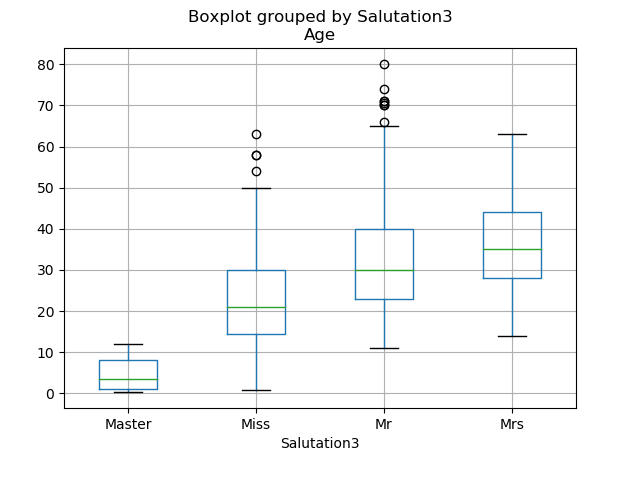

In [53]:
data.boxplot(column = 'Age', by = 'Salutation3')

<IPython.core.display.Javascript object>


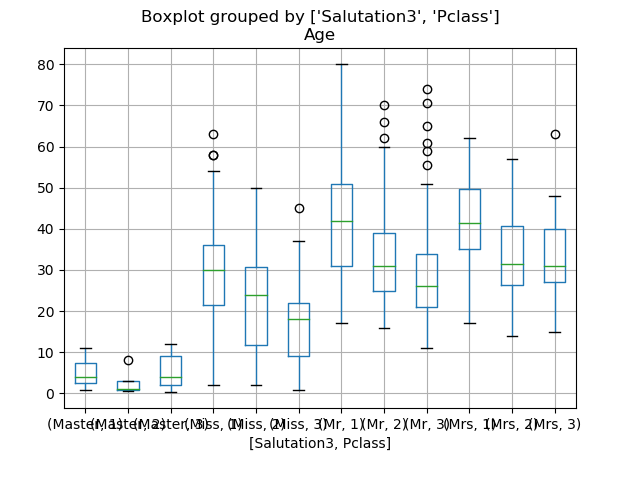

In [54]:
data.boxplot(column ='Age', by =['Salutation3', 'Pclass'])

## More clever imputation
Now that we've got this data, we should be able to use it to re-do our imputation of the missing values for Age.  Instead of using an overall mean age, we can use the mean age of those with the same salutation and passenger class; this should give us much more accurate imputed values, and therefore introduce less of a bias.  Note that this still won't be perfect; it's just better than what we had before.

In [55]:
# make a pivot table with the averages we want
pt = data.pivot_table(values = 'Age', index = ['Salutation3'], columns = ['Pclass'])
pt

Pclass,1,2,3
Salutation3,,,
Master,5.306667,2.258889,5.350833
Miss,29.744681,22.390625,16.123188
Mr,42.382653,33.588889,28.724891
Mrs,40.631579,33.547619,33.515152


In [56]:
# copy age where it exists
data['Age1'] = data['Age']
data['Age2'] = data['Age']
# fill in (impute) ages where they are missing

#version using the mean
meanAge = data.Age.mean()
data['Age1'].fillna(meanAge, inplace = True)

#version using our more clever solution
def imputeAge(person):
    return pt[person['Pclass']][person['Salutation3']]

data['Age2'].fillna(data[data['Age2'].isnull()].apply(imputeAge, axis = 1), inplace = True)
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3,Age1,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,Mr,22.000000,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,Mrs,38.000000,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,Miss,26.000000,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,Mrs,35.000000,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,Mr,35.000000,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr,Mr,29.699118,28.724891
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr,Mr,54.000000,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Master,Master,2.000000,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs,Mrs,27.000000,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs,Mrs,14.000000,14.000000


In [ ]:
data.describe() #see how the statistics of Age, Age1, and Age2 compare

# Set up for machine learning
Now that we've handled our missing values, we can set up for machine learning.  In particular, since scikit-learn likes numbers better than strings, we're going to have to map 'Sex' to numeric values rather than text values.  We would need to do something similar for 'Embarked' if we wanted to use that attribute, but we'll skip that one for now (on the assumption that where you got on probably doesn't have much to do with whether you got off).

In [57]:
# set up what we want to use as input for prediction
def sexStringToNumber(s):
    if s == 'female':
        return 1
    else:
        return 0

data['Sex2'] = data['Sex'].apply(sexStringToNumber)
data[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Salutation2,Salutation3,Age1,Age2,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,Mr,22.000000,22.000000,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,Mrs,38.000000,38.000000,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,Miss,26.000000,26.000000,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,Mrs,35.000000,35.000000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,Mr,35.000000,35.000000,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr,Mr,29.699118,28.724891,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr,Mr,54.000000,54.000000,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Master,Master,2.000000,2.000000,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs,Mrs,27.000000,27.000000,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs,Mrs,14.000000,14.000000,1


In [58]:
# Now let's pick the features we want and convert them to numpy arrays
examples = data[['Age2', 'Sex2', 'Fare', 'Pclass', 'Parch']].values
examples

array([[22.        ,  0.        ,  7.25      ,  3.        ,  0.        ],
       [38.        ,  1.        , 71.2833    ,  1.        ,  0.        ],
       [26.        ,  1.        ,  7.925     ,  3.        ,  0.        ],
       ...,
       [16.12318841,  1.        , 23.45      ,  3.        ,  2.        ],
       [26.        ,  0.        , 30.        ,  1.        ,  0.        ],
       [32.        ,  0.        ,  7.75      ,  3.        ,  0.        ]])

In [59]:
# and also set up the survival values as our "class labels"
labels = data['Survived'].values
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [60]:
# imparts for up for learning and evaluation
import math
import scipy
# import some data and classifiers to play with
from sklearn import neighbors
from sklearn import svm
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix

# Now we're ready!
Finally, we're set up to do some supervised learning!  Let's use repeated k-fold crossvalidation so we can trust our results.  We'll start by testing a nearest-neighbor classifier and comparing it to an RBF-kernel Support Vector Machine.

In [63]:
# train and evaluate some classifiers using repeated k-fold crossvalidation
rkf = RepeatedKFold(n_splits = 5, n_repeats = 5)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmRbf = svm.SVC(kernel='rbf', gamma='auto')

nnScores = cross_val_score(nn, examples, labels, cv = rkf)
svmScores = cross_val_score(svmRbf, examples, labels, cv = rkf)

print('Nearest Neighbor: mean=', nnScores.mean(), ', stdDev =', nnScores.std())
print('RBF SVM: mean=', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean= 0.6927073002322515 , stdDev = 0.022484792788229065
RBF SVM: mean= 0.6924838365451008 , stdDev = 0.03195650894349709
Difference between means: -0.00022346368715064902


MannwhitneyuResult(statistic=289.5, pvalue=0.3309622821093058)

## Can we do better?
Let's try some alternate feature sets to see which features help/hurt us

In [64]:
# function to let us compare classifiers, or example sets
def compareClassifiers(clfA, clfB, examplesA, examplesB, labels):
    rkf = RepeatedKFold(n_splits = 5, n_repeats = 10)

    scoresA = cross_val_score(clfA, examplesA, labels, cv = rkf)
    scoresB = cross_val_score(clfB, examplesB, labels, cv = rkf)

    print('Classifier A: mean=', scoresA.mean(), ', stdDev =', scoresA.std())
    print('Classifier B: mean=', scoresB.mean(), ', stdDev =', scoresB.std())
    print('Difference between means:', scoresA.mean() - scoresB.mean())
    print('statistical analysis:', scipy.stats.mannwhitneyu(scoresA, scoresB))

In [65]:
# we'll make up a few variations on our example set using different features
examples1 = data[['Age1', 'Sex2', 'Fare', 'Pclass', 'Parch']].values # use age estimate 1
examples2 = data[['Age2', 'Sex2', 'Fare', 'Pclass', 'Parch']].values # use age estimate 2
examples3 = data[['Age1', 'Sex2']].values # use just age1 and sex
examples4 = data[['Age2', 'Sex2']].values # use just age2 and sex

# and we'll also set up a couple of classifiers to compare
nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmRbf = svm.SVC(kernel='rbf', gamma='auto')

### Testing different configurations:

In [66]:
print('knn vs svmRbf on examples1:')
compareClassifiers(nn, svmRbf, examples1, examples1, labels)

knn vs svmRbf on examples1:
Classifier A: mean= 0.6917042244680184 , stdDev = 0.024648841580689067
Classifier B: mean= 0.6846262004896115 , stdDev = 0.028900810437762575
Difference between means: 0.007078023978406844
statistical analysis: MannwhitneyuResult(statistic=992.5, pvalue=0.03795904321538025)


In [67]:
print('svmRbf on examples1 vs examples2:')
compareClassifiers(svmRbf, svmRbf, examples1, examples2, labels)

svmRbf on examples1 vs examples2:
Classifier A: mean= 0.6822666499278138 , stdDev = 0.02348345032992541
Classifier B: mean= 0.6909158244931264 , stdDev = 0.029525947457923935
Difference between means: -0.008649174565312556
statistical analysis: MannwhitneyuResult(statistic=1001.0, pvalue=0.04315100234918096)


In [68]:
print('svmRbf on examples1 vs examples3:')
compareClassifiers(svmRbf, svmRbf, examples1, examples3, labels)

svmRbf on examples1 vs examples3:
Classifier A: mean= 0.6805737241855502 , stdDev = 0.03128352395533723
Classifier B: mean= 0.7774496265143429 , stdDev = 0.028850298268792155
Difference between means: -0.09687590232879273
statistical analysis: MannwhitneyuResult(statistic=29.5, pvalue=1.981384347619427e-17)


In [69]:
print('svmRbf on examples3 vs examples4:')
compareClassifiers(svmRbf, svmRbf, examples3, examples4, labels)

svmRbf on examples3 vs examples4:
Classifier A: mean= 0.7790088506685079 , stdDev = 0.027205631329210677
Classifier B: mean= 0.777656769819848 , stdDev = 0.026255885705458306
Difference between means: 0.0013520808486598979
statistical analysis: MannwhitneyuResult(statistic=1201.5, pvalue=0.37013468161870666)


In [70]:
print('knn vs svmRbf on examples4:')
compareClassifiers(nn, svmRbf, examples4, examples4, labels)

knn vs svmRbf on examples4:
Classifier A: mean= 0.6822553512020589 , stdDev = 0.043256570283674224
Classifier B: mean= 0.7787778544975206 , stdDev = 0.024377243137027618
Difference between means: -0.09652250329546164
statistical analysis: MannwhitneyuResult(statistic=14.5, pvalue=8.213328326256785e-18)


In [71]:
print('knn on examples1 vs examples4:')
compareClassifiers(nn, nn, examples1, examples4, labels)

knn on examples1 vs examples4:
Classifier A: mean= 0.6889040236017827 , stdDev = 0.029379993645469192
Classifier B: mean= 0.6915799384847153 , stdDev = 0.04148894684123317
Difference between means: -0.0026759148829326174
statistical analysis: MannwhitneyuResult(statistic=1144.0, pvalue=0.233321020994064)


# Overall results:
The main takeaway here is that we do a lot better with just the age and sex than we do with the addition of fare, class, and child count; these features are serving as distractors.  Note that if we really wanted to be thorough, we might want to test each of these independently (and possibly in combinations as well), though based on our earlier analysis it seems reasonable to expect that Age and Sex would be the primary features that would be useful.

The different methods of estimating age seems to help a little in the case where we have all the features; in the case where we use just age and sex, it actually doesn't make a statisticallay meaningful difference.

On the full feature set, SVM seems a little better than KNN on average, but the margin is small enough that it's barely statistically significant even using 5x10 fold cross-validation.  The difference is that the SVM improves on the reduced feature set, where the KNN classifier doesn't do any better with 2 features than it does with 5.

It should be pointed out that we didn't test out alternative values of K for the KNN, nor did we play with different kernels or parameters for the SVM, and we only tested two types of classifiers.  We could also do more work with the features, including things like range normalization (e.g. the range of values that 'age', 'fare', and 'sex' can take on is vastly different, and we might get better results (especially for KNN) if we normalized all features to the range [0,1]).  There are lots more things we can try, both on the pre-processing side and on the classification side.

If we really cared about maximizing performance, we probably wouldn't stop here.  But since we're almost certain to have run out of class time by this point in the example, we'll call it a day :)

The further improvement of these results is left as an exercise to the reader, and I encourage you to play around with this problem some more to get a feel for what might work better.